In [10]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import numpy as np
import pandas as pd





In [11]:
# In[4]:


df=pd.read_csv('C:/Users/nmr17/Downloads/stress.csv')
df.head()


# In[6]:





,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [12]:
df.describe()


# In[8]:


df.isnull().sum()


# In[10]:




subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [13]:
import nltk
import re
from nltk. corpus import stopwords
import string
nltk. download( 'stopwords' )
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))

def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.
    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.
    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets
    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ". join(text)
    return text
df [ "text"] = df["text"]. apply(clean)


# In[18]:




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmr17\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


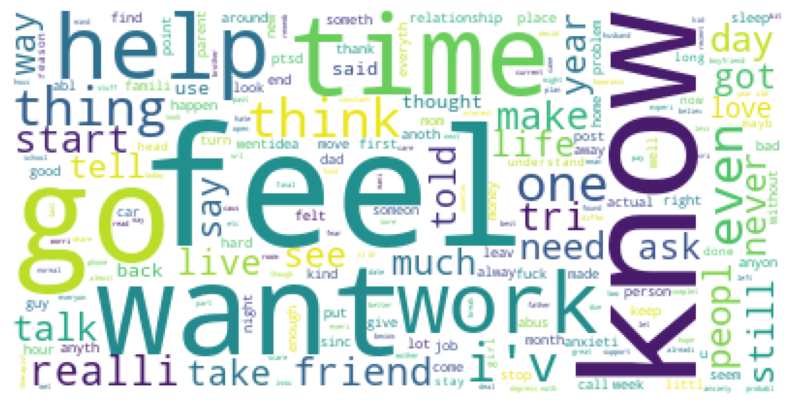

In [17]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(10, 10) )
plt. imshow(wordcloud )
plt. axis("off")
plt. show( )


# In[21]:




In [18]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

x = np.array (df["text"])
y = np.array (df["label"])

cv = CountVectorizer ()
X = cv. fit_transform(x)
print(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33)


# In[22]:




  (0, 7405)	1
  (0, 3278)	1
  (0, 9454)	1
  (0, 861)	1
  (0, 8359)	1
  (0, 3750)	1
  (0, 7214)	1
  (0, 8908)	1
  (0, 298)	1
  (0, 9749)	1
  (0, 4303)	1
  (0, 5034)	1
  (0, 5325)	1
  (0, 2188)	1
  (0, 5118)	1
  (0, 3265)	1
  (0, 2593)	3
  (0, 4188)	1
  (0, 5316)	1
  (0, 3697)	1
  (0, 8339)	1
  (0, 6861)	1
  (0, 4150)	1
  (0, 5174)	1
  (0, 1831)	1
  :	:
  (2836, 877)	1
  (2836, 4555)	1
  (2836, 2928)	1
  (2836, 4615)	1
  (2836, 4785)	1
  (2836, 4511)	1
  (2837, 7405)	2
  (2837, 3018)	1
  (2837, 5533)	2
  (2837, 8784)	1
  (2837, 8502)	1
  (2837, 6770)	1
  (2837, 4318)	1
  (2837, 9670)	1
  (2837, 5569)	1
  (2837, 8881)	1
  (2837, 5713)	1
  (2837, 2587)	1
  (2837, 7468)	1
  (2837, 2351)	1
  (2837, 7804)	1
  (2837, 2758)	1
  (2837, 8880)	1
  (2837, 5459)	1
  (2837, 3020)	1


In [24]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(xtrain,ytrain)


# In[26]:


user=input("Enter the text")
data=cv.transform([user]).toarray()
output=model.predict(data)
print(output)

Enter the textsad
[1]
